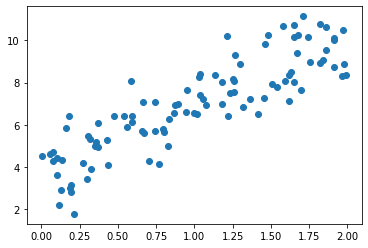

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#----------- Generating data for training -------------#
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)
plt.scatter(X,y)

Text(0, 0.5, 'linreg coefficients')

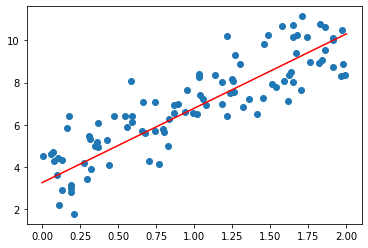

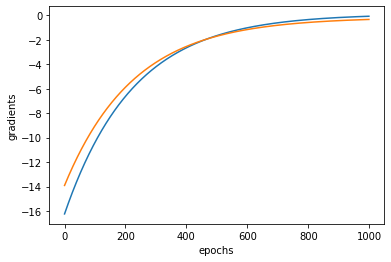

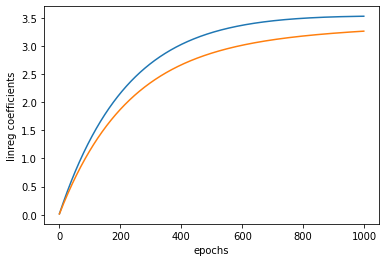

In [10]:
#-------------Linear Regression using gradient descent algorith --------------#
m=0
c=0
lr=0.001
epochs=1000
n=float(len(X))
m_history_GD=[]
c_history_GD=[]
m_values_GD=[]
c_values_GD=[]
for i in range(epochs):
    y_pred=m*X+c
    gradient_m=(-2/n)*sum(X * (y - y_pred))
    gradient_c=(-2/n)*sum(y - y_pred)
    m=m-lr*gradient_m
    c=c-lr*gradient_c
    m_history_GD.append(gradient_m)
    c_history_GD.append(gradient_c)
    m_values_GD.append(m)
    c_values_GD.append(c)
plt.scatter(X,y)
plt.plot([0,2],[m*0+c,m*2+c],'r')
plt.figure()
plt.plot(m_history_GD)
plt.plot(c_history_GD)
plt.xlabel('epochs')
plt.ylabel('gradients')
plt.figure()
plt.plot(m_values_GD)
plt.plot(c_values_GD)
plt.xlabel('epochs')
plt.ylabel('linreg coefficients')

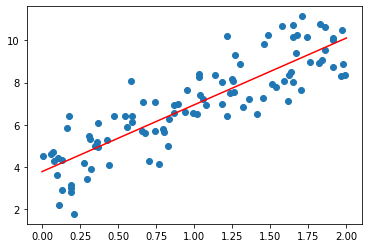

In [3]:
#-------------Linear Regression using gradient descent using linear regression model in sklearn--------------#
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X,y)
pred_y0=linreg.predict(np.array([0]).reshape(1,-1))
pred_y2=linreg.predict(np.array([2]).reshape(1,-1))
plt.scatter(X,y)
plt.plot([0,2],[pred_y0[0][0],pred_y2[0][0]],'r')

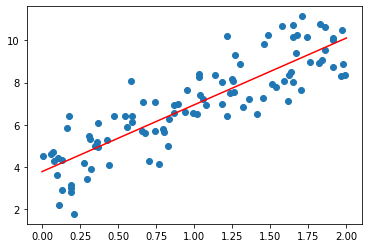

In [4]:
#-------------Linear Regression using Normal Equation--------------#

X_b=np.c_[np.ones((100,1)),X] # Adding bias term x0 for w0
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
plt.scatter(X,y)
plt.plot([0,2],[theta_best[0][0],theta_best[0][0]+theta_best[1][0]*2],'r')

Text(0, 0.5, 'linreg coefficients')

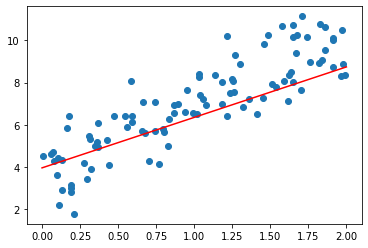

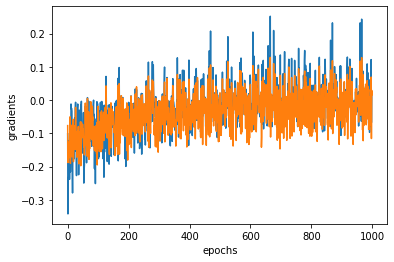

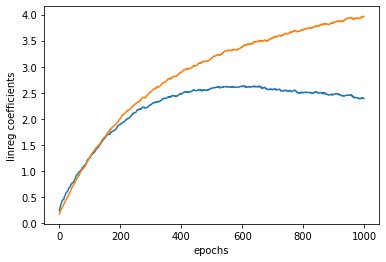

In [11]:
#-------------- using SGD regressor algorithm --------------------#
n_epochs=10
m=np.random.random()
c=np.random.random()
n=float(len(X))
eta=0.1
X_temp=X.copy()
m_history_SGD=[]
c_history_SGD=[]
m_values_SGD=[]
c_values_SGD=[]
for i in range(n_epochs):
    np.random.shuffle(X_temp)
    for j in range(len(X_temp)):
        y_pred=m*X_temp[j]+c
        gradient_m=(-2/n)*sum(X_temp[j] * (y[j] - y_pred))
        gradient_c=(-2/n)*sum(y[j] - y_pred)
        m=m-eta*gradient_m
        c=c-eta*gradient_c
        m_history_SGD.append(gradient_m)
        c_history_SGD.append(gradient_c)
        m_values_SGD.append(m)
        c_values_SGD.append(c)
plt.scatter(X,y)
plt.plot([0,2],[m*0+c,m*2+c],'r')
plt.figure()
plt.plot(m_history_SGD)
plt.plot(c_history_SGD)
plt.xlabel('epochs')
plt.ylabel('gradients')
plt.figure()
plt.plot(m_values_SGD)
plt.plot(c_values_SGD)
plt.xlabel('epochs')
plt.ylabel('linreg coefficients')

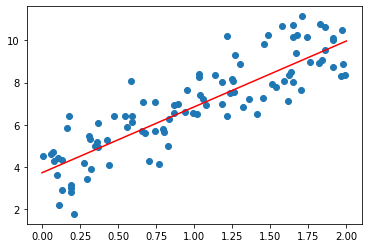

In [6]:
#--------------- using SGD regressor model in scikit learn --------------#
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(penalty=None,eta0=0.1,max_iter=50)
sgd.fit(X,y)
plt.scatter(X,y)
plt.plot([0,2],[sgd.predict([[0]]),sgd.predict([[2]])],'r')